# Part 1

## Determining the Frequency of ‌Base Notes

In [12]:
from pydub import AudioSegment
from scipy.signal import find_peaks
from scipy.fftpack import fft
import numpy as np

# Redefining file paths since the variable was lost
file_paths = {
    
    "Do_octave1": "./part1/8_named_white/Do_octave1.m4a",
    "Do_octave2": "./part1/8_named_white/Do_octave2.m4a",
    "Fa_octave1": "./part1/8_named_white/Fa_octave1.m4a",
    "La_octave1": "./part1/8_named_white/La_octave1.m4a",
    "Mi_octave1": "./part1/8_named_white/Mi_octave1.m4a",
    "Re_octave1": "./part1/8_named_white/Re_octave1.m4a",
    "Si_octave1": "./part1/8_named_white/Si_octave1.m4a",
    "Sol_octave1": "./part1/8_named_white/Sol_octave1.m4a"
}

# Function to process audio and extract dominant frequency
def get_dominant_frequency(file_path):
    # Load audio file
    audio = AudioSegment.from_file(file_path)
    samples = np.array(audio.get_array_of_samples())
    if audio.channels == 2:  # If stereo, take one channel
        samples = samples[::2]
    # Perform FFT
    fft_result = np.abs(fft(samples))
    frequencies = np.fft.fftfreq(len(fft_result), d=1/audio.frame_rate)
    # Filter for positive frequencies
    positive_freqs = frequencies[:len(frequencies)//2]
    positive_fft = fft_result[:len(fft_result)//2]
    # Find the peak frequency
    peak_idx = np.argmax(positive_fft)
    peak_freq = positive_freqs[peak_idx]
    return peak_freq

# Extract dominant frequencies from each file
dominant_frequencies = {}
for note, path in file_paths.items():
    dominant_frequencies[note] = get_dominant_frequency(path)

dominant_frequencies


{'Do_octave1': np.float64(519.445383834968),
 'Do_octave2': np.float64(1060.15407310277),
 'Fa_octave1': np.float64(705.6183510638298),
 'La_octave1': np.float64(884.9587912087911),
 'Mi_octave1': np.float64(660.1159793814433),
 'Re_octave1': np.float64(579.8737960810362),
 'Si_octave1': np.float64(996.8895800933127),
 'Sol_octave1': np.float64(785.1747760407518)}

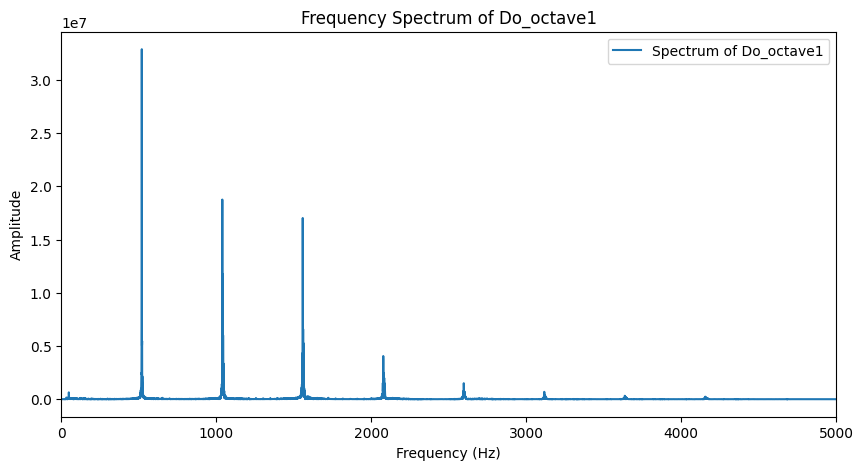

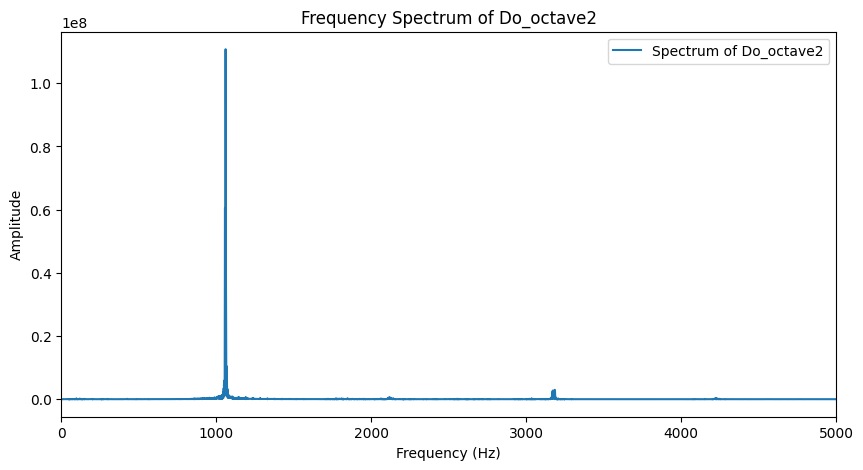

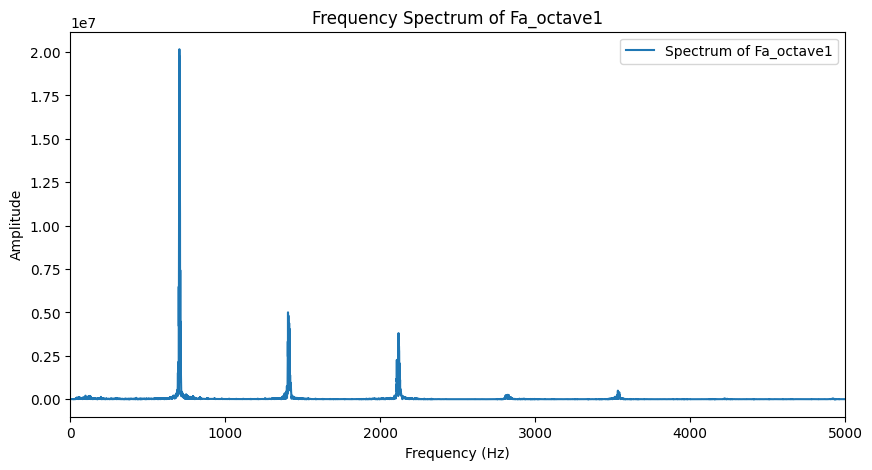

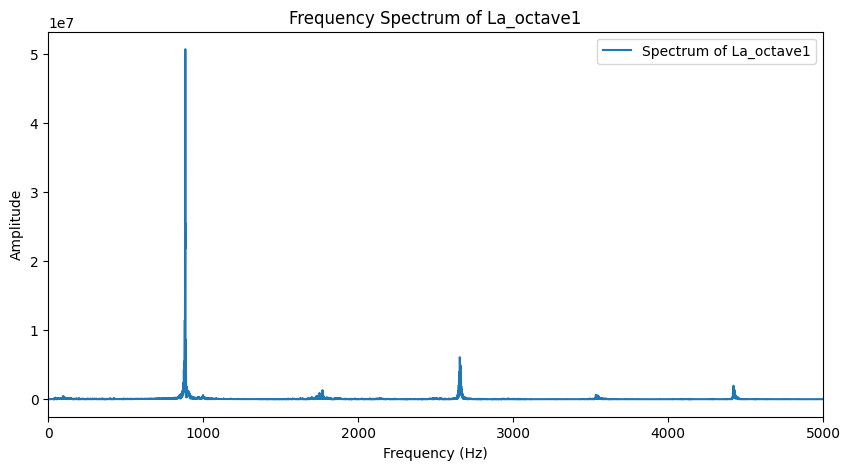

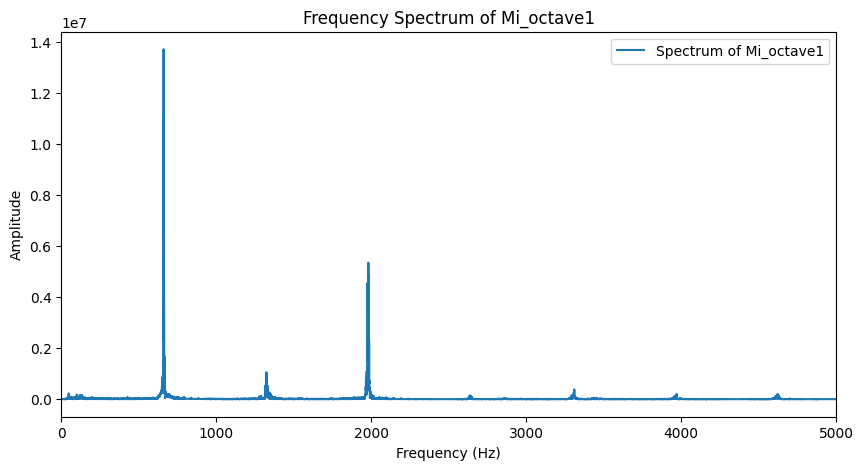

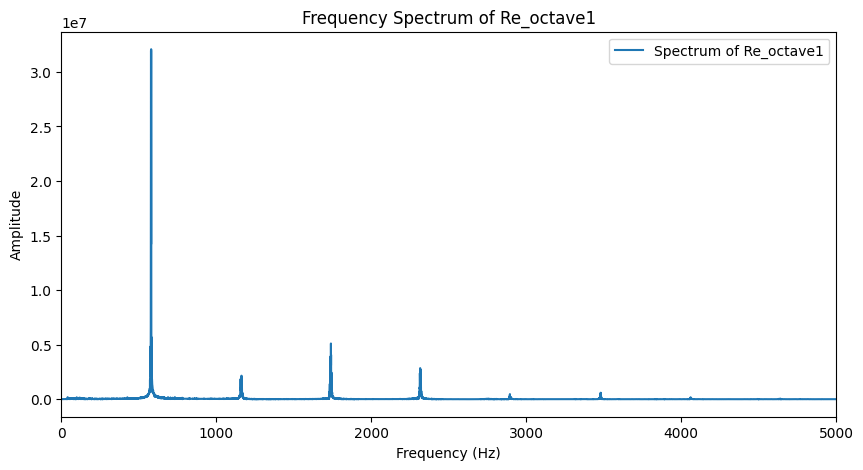

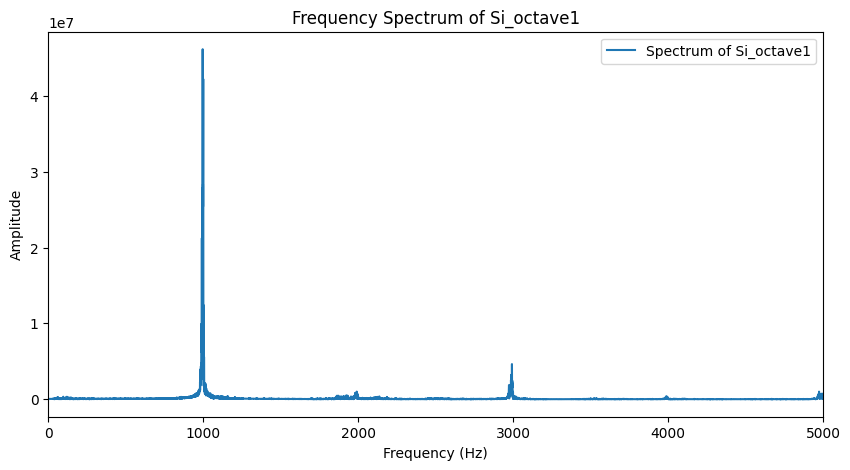

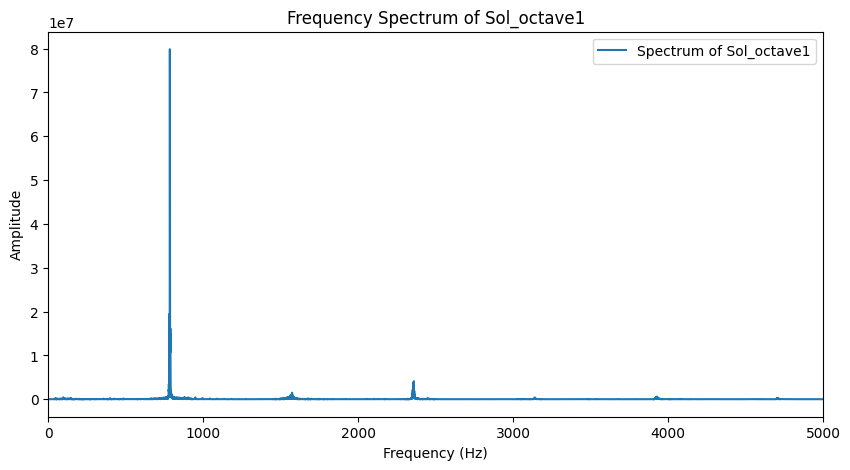

{'Do_octave1': np.float64(519.445383834968),
 'Do_octave2': np.float64(1060.15407310277),
 'Fa_octave1': np.float64(705.6183510638298),
 'La_octave1': np.float64(884.9587912087911),
 'Mi_octave1': np.float64(660.1159793814433),
 'Re_octave1': np.float64(579.8737960810362),
 'Si_octave1': np.float64(996.8895800933127),
 'Sol_octave1': np.float64(785.1747760407518)}

In [1]:
from scipy.fftpack import fft
from pydub import AudioSegment
import matplotlib.pyplot as plt
import numpy as np

# Paths to uploaded files
uploaded_files = {
     "Do_octave1": "./part1/8_named_white/Do_octave1.m4a",
    "Do_octave2": "./part1/8_named_white/Do_octave2.m4a",
    "Fa_octave1": "./part1/8_named_white/Fa_octave1.m4a",
    "La_octave1": "./part1/8_named_white/La_octave1.m4a",
    "Mi_octave1": "./part1/8_named_white/Mi_octave1.m4a",
    "Re_octave1": "./part1/8_named_white/Re_octave1.m4a",
    "Si_octave1": "./part1/8_named_white/Si_octave1.m4a",
    "Sol_octave1": "./part1/8_named_white/Sol_octave1.m4a"
}

def get_frequency_spectrum(file_path):
    """Analyze the frequency spectrum of an audio file."""
    audio = AudioSegment.from_file(file_path)
    samples = np.array(audio.get_array_of_samples())
    if audio.channels == 2:  # If stereo, take one channel
        samples = samples[::2]
    
    # Perform FFT
    fft_result = np.abs(fft(samples))
    frequencies = np.fft.fftfreq(len(fft_result), d=1/audio.frame_rate)
    positive_freqs = frequencies[:len(frequencies)//2]
    positive_fft = fft_result[:len(fft_result)//2]
    return positive_freqs, positive_fft

# Compute and plot frequency spectra for all notes
frequency_analysis = {}
for note, path in uploaded_files.items():
    freqs, spectrum = get_frequency_spectrum(path)
    frequency_analysis[note] = (freqs, spectrum)

    # Plot spectrum
    plt.figure(figsize=(10, 5))
    plt.plot(freqs, spectrum, label=f"Spectrum of {note}")
    plt.title(f"Frequency Spectrum of {note}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.xlim(0, 5000)  # Limit to the audible range for better visibility
    plt.legend()
    plt.show()

# Extract dominant frequencies for analysis
dominant_frequencies = {note: freqs[np.argmax(spectrum)] for note, (freqs, spectrum) in frequency_analysis.items()}
dominant_frequencies

## Determining The frequency of Song Notes

In [13]:
birthday_notes_paths = {
    "Note_1": "./part1/26_notes_happy/1.m4a",
    "Note_2": "./part1/26_notes_happy/2.m4a",
    "Note_3": "./part1/26_notes_happy/3.m4a",
    "Note_4": "./part1/26_notes_happy/4.m4a",
    "Note_5": "./part1/26_notes_happy/5.m4a",
    "Note_6": "./part1/26_notes_happy/6.m4a",
    "Note_7": "./part1/26_notes_happy/7.m4a",
    "Note_8": "./part1/26_notes_happy/8.m4a",
    "Note_9": "./part1/26_notes_happy/9.m4a",
    "Note_10": "./part1/26_notes_happy/10.m4a",
    "Note_11": "./part1/26_notes_happy/11.m4a",
    "Note_12": "./part1/26_notes_happy/12.m4a",
    "Note_13": "./part1/26_notes_happy/13.m4a",
    "Note_14": "./part1/26_notes_happy/14.m4a",
    "Note_15": "./part1/26_notes_happy/15.m4a",
    "Note_16": "./part1/26_notes_happy/16.m4a",
    "Note_17": "./part1/26_notes_happy/17.m4a",
    "Note_18": "./part1/26_notes_happy/18.m4a",
    "Note_19": "./part1/26_notes_happy/19.m4a",
    "Note_20": "./part1/26_notes_happy/20.m4a",
    "Note_21": "./part1/26_notes_happy/21.m4a",
    "Note_22": "./part1/26_notes_happy/22.m4a",
    "Note_23": "./part1/26_notes_happy/23.m4a",
    "Note_24": "./part1/26_notes_happy/24.m4a",
    "Note_25": "./part1/26_notes_happy/25.m4a",
    "Note_26": "./part1/26_notes_happy/26.m4a"
}

# Extract dominant frequencies for the birthday notes
birthday_note_frequencies = {}
for note, path in birthday_notes_paths.items():
    birthday_note_frequencies[note] = get_dominant_frequency(path)

birthday_note_frequencies

{'Note_1': np.float64(999.107142857143),
 'Note_2': np.float64(781.25),
 'Note_3': np.float64(786.0576923076924),
 'Note_4': np.float64(796.875),
 'Note_5': np.float64(997.159090909091),
 'Note_6': np.float64(890.6250000000001),
 'Note_7': np.float64(997.9440789473684),
 'Note_8': np.float64(788.7228260869565),
 'Note_9': np.float64(1055.357142857143),
 'Note_10': np.float64(785.15625),
 'Note_11': np.float64(998.1617647058825),
 'Note_12': np.float64(1055.3977272727275),
 'Note_13': np.float64(787.9464285714286),
 'Note_14': np.float64(785.15625),
 'Note_15': np.float64(886.71875),
 'Note_16': np.float64(789.0625),
 'Note_17': np.float64(785.625),
 'Note_18': np.float64(1054.6875),
 'Note_19': np.float64(788.7228260869565),
 'Note_20': np.float64(790.7608695652174),
 'Note_21': np.float64(996.6032608695652),
 'Note_22': np.float64(892.6630434782609),
 'Note_23': np.float64(792.4107142857143),
 'Note_24': np.float64(785.15625),
 'Note_25': np.float64(1054.6875),
 'Note_26': np.float64(

## Naming Each Note Based on the Frequencies

In [19]:
# Function to match the closest reference frequency to the given frequency
def match_note_frequency(frequency, reference_frequencies):
    closest_note = None
    smallest_diff = float('inf')
    for note, ref_freq in reference_frequencies.items():
        diff = abs(frequency - ref_freq)
        if diff < smallest_diff:
            smallest_diff = diff
            closest_note = note
    return closest_note

# Match each birthday note frequency to the closest reference note
matched_notes = {}
for note, freq in birthday_note_frequencies.items():
    matched_notes[note] = match_note_frequency(freq, dominant_frequencies)

matched_notes

{'Note_1': 'Si_octave1',
 'Note_2': 'Sol_octave1',
 'Note_3': 'Sol_octave1',
 'Note_4': 'Sol_octave1',
 'Note_5': 'Si_octave1',
 'Note_6': 'La_octave1',
 'Note_7': 'Si_octave1',
 'Note_8': 'Sol_octave1',
 'Note_9': 'Do_octave2',
 'Note_10': 'Sol_octave1',
 'Note_11': 'Si_octave1',
 'Note_12': 'Do_octave2',
 'Note_13': 'Sol_octave1',
 'Note_14': 'Sol_octave1',
 'Note_15': 'La_octave1',
 'Note_16': 'Sol_octave1',
 'Note_17': 'Sol_octave1',
 'Note_18': 'Do_octave2',
 'Note_19': 'Sol_octave1',
 'Note_20': 'Sol_octave1',
 'Note_21': 'Si_octave1',
 'Note_22': 'La_octave1',
 'Note_23': 'Sol_octave1',
 'Note_24': 'Sol_octave1',
 'Note_25': 'Do_octave2',
 'Note_26': 'Do_octave2'}

## Determining Note Timings

In [30]:
# Function to get the duration of an audio file in seconds
def get_audio_duration(file_path):
    audio = AudioSegment.from_file(file_path)
    return len(audio) / 1000.0  # Duration in seconds

# Calculate durations for each birthday note
note_durations = {}
for note, path in birthday_notes_paths.items():
    note_durations[note] = get_audio_duration(path)
    print(f"{note}: {note_durations[note]} seconds")

Note_1: 0.747 seconds
Note_2: 0.256 seconds
Note_3: 0.277 seconds
Note_4: 0.448 seconds
Note_5: 0.235 seconds
Note_6: 0.235 seconds
Note_7: 0.811 seconds
Note_8: 0.491 seconds
Note_9: 0.747 seconds
Note_10: 0.256 seconds
Note_11: 0.725 seconds
Note_12: 0.704 seconds
Note_13: 0.448 seconds
Note_14: 0.256 seconds
Note_15: 0.256 seconds
Note_16: 0.256 seconds
Note_17: 0.533 seconds
Note_18: 0.469 seconds
Note_19: 0.491 seconds
Note_20: 0.491 seconds
Note_21: 0.491 seconds
Note_22: 0.491 seconds
Note_23: 0.448 seconds
Note_24: 0.256 seconds
Note_25: 0.683 seconds
Note_26: 0.277 seconds


In [39]:
from sklearn.cluster import KMeans
import numpy as np

# Extract durations as a numpy array for clustering
durations_array = np.array(list(note_durations.values())).reshape(-1, 1)

# Use KMeans clustering to group durations into three categories
kmeans = KMeans(n_clusters=3, random_state=0).fit(durations_array)

# Assign cluster labels to each note duration
cluster_labels = kmeans.labels_

# Map cluster centers to note types (Eighth, Black, Dotted Black) based on duration order
cluster_centers = kmeans.cluster_centers_.flatten()
sorted_clusters = np.argsort(cluster_centers)  # Sort clusters by duration

# Map sorted clusters to note types
cluster_to_note_type = {
    sorted_clusters[0]: "Eighth",
    sorted_clusters[1]: "Black",
    sorted_clusters[2]: "Dotted Black",
}

# Classify each note based on its cluster label
final_note_timing = {}
for i, (note, duration) in enumerate(note_durations.items()):
    final_note_timing[note] = cluster_to_note_type[cluster_labels[i]]

final_note_timing

{'Note_1': 'Dotted Black',
 'Note_2': 'Eighth',
 'Note_3': 'Eighth',
 'Note_4': 'Black',
 'Note_5': 'Eighth',
 'Note_6': 'Eighth',
 'Note_7': 'Dotted Black',
 'Note_8': 'Black',
 'Note_9': 'Dotted Black',
 'Note_10': 'Eighth',
 'Note_11': 'Dotted Black',
 'Note_12': 'Dotted Black',
 'Note_13': 'Black',
 'Note_14': 'Eighth',
 'Note_15': 'Eighth',
 'Note_16': 'Eighth',
 'Note_17': 'Black',
 'Note_18': 'Black',
 'Note_19': 'Black',
 'Note_20': 'Black',
 'Note_21': 'Black',
 'Note_22': 'Black',
 'Note_23': 'Black',
 'Note_24': 'Eighth',
 'Note_25': 'Dotted Black',
 'Note_26': 'Eighth'}

In [73]:
from pydub import AudioSegment

# Paths to the audio files
all_note_paths = {
    f"Note_{i}": f"./part1/26_notes_happy/{i}.m4a" for i in range(1, 27)
}

# The sequence of musical notes based on the sheet music
note_sequence = [
    "Sol", "Sol", "Do",  # میزان اول
    "Sol", "Sol", "Do",
    "Sol", "Sol", "Do", "Do",
    "Si", "La", "Si",

    "Sol", "Sol", "Si",
    "Sol", "Sol", "Si",
    "Sol", "Sol", "La", "Sol",
    "La", "Do", "Do",
]

# The timing types for the notes in the sequence
song_structure = [
    "Eighth", "Black", "Dotted Black",
    "Eighth", "Black", "Dotted Black",
    "Eighth", "Black", "Eighth", "Black",
    "Eighth", "Black", "Dotted Black",

    "Eighth", "Black", "Dotted Black",
    "Eighth", "Black", "Dotted Black",
    "Eighth", "Black", "Eighth", "Black",
    "Eighth", "Black", "Dotted Black",
]

# Classified notes with timing and their corresponding file IDs
# This is dynamically constructed during the classification process
final_classified_notes_with_remaining = {
    "Note_1": ("Si", "Dotted Black"),
    "Note_2": ("Sol", "Eighth"),
    "Note_3": ("Sol", "Eighth"),
    "Note_4": ("Sol", "Black"),
    "Note_5": ("Si", "Eighth"),
    "Note_6": ("La", "Eighth"),
    "Note_7": ("Si", "Dotted Black"),
    "Note_8": ("Sol", "Black"),
    "Note_9": ("Do", "Dotted Black"),
    "Note_10": ("Sol", "Eighth"),
    "Note_11": ("Si", "Dotted Black"),
    "Note_12": ("Do", "Dotted Black"),
    "Note_13": ("Sol", "Black"),
    "Note_14": ("Sol", "Eighth"),
    "Note_15": ("La", "Eighth"),
    "Note_16": ("Sol", "Eighth"),
    "Note_17": ("Sol", "Black"),
    "Note_18": ("Do", "Black"),
    "Note_19": ("Sol", "Black"),
    "Note_20": ("Sol", "Black"),
    "Note_21": ("Si", "Black"),
    "Note_22": ("La", "Black"),
    "Note_23": ("Sol", "Black"),
    "Note_24": ("Sol", "Eighth"),
    "Note_25": ("Do", "Dotted Black"),
    "Note_26": ("Do", "Eighth"),
}

# Load all audio files
note_audio_segments = {note: AudioSegment.from_file(path) for note, path in all_note_paths.items()}

# Create the song by matching notes from the sequence and timing
song_audio = AudioSegment.silent(duration=0)  # Start with an empty song

for note, timing in zip(note_sequence, song_structure):
    for audio_note, (note_name, timing_type) in final_classified_notes_with_remaining.items():
        if note == note_name and timing == timing_type:
            song_audio += note_audio_segments[audio_note]
            print(f"Added {audio_note}, {note} to the song")
            # del final_classified_notes_with_remaining[audio_note]  # Remove the used note
            
            break

# Export the final song
output_path = "Happy_Birthday_Farsi.mp3"
song_audio.export(output_path, format="mp3")
print(f"The song was successfully saved as: {output_path}")

Added Note_2, Sol to the song
Added Note_4, Sol to the song
Added Note_9, Do to the song
Added Note_2, Sol to the song
Added Note_4, Sol to the song
Added Note_9, Do to the song
Added Note_2, Sol to the song
Added Note_4, Sol to the song
Added Note_26, Do to the song
Added Note_18, Do to the song
Added Note_5, Si to the song
Added Note_22, La to the song
Added Note_1, Si to the song
Added Note_2, Sol to the song
Added Note_4, Sol to the song
Added Note_1, Si to the song
Added Note_2, Sol to the song
Added Note_4, Sol to the song
Added Note_1, Si to the song
Added Note_2, Sol to the song
Added Note_4, Sol to the song
Added Note_6, La to the song
Added Note_4, Sol to the song
Added Note_6, La to the song
Added Note_18, Do to the song
Added Note_9, Do to the song
The song was successfully saved as: Happy_Birthday_Farsi.mp3


Note: The TA told us that we could use the previously used note and there is no need to delete the used nodes. I this is not the case, by uncommenting the commented line in this cell, the song would be complete without using the previously used notes. but the given data is problematic as note 21 is Si note with duration of a black note. I you notice the music sheet for the song, there is no such note in the song! so it won't be selected.

# Part 2

## Choosing the best K

/var/folders/l0/_cgjl26d5xj31bs49yx7mv440000gn/T/ipykernel_75923/153903965.py:25: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/Users/azimi2kht/miniconda3/envs/signal/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


K: 1, Validation Accuracy: 1.0
K: 2, Validation Accuracy: 1.0
K: 3, Validation Accuracy: 1.0
K: 4, Validation Accuracy: 1.0
K: 5, Validation Accuracy: 1.0
K: 6, Validation Accuracy: 0.5
K: 7, Validation Accuracy: 0.5
K: 8, Validation Accuracy: 0.5


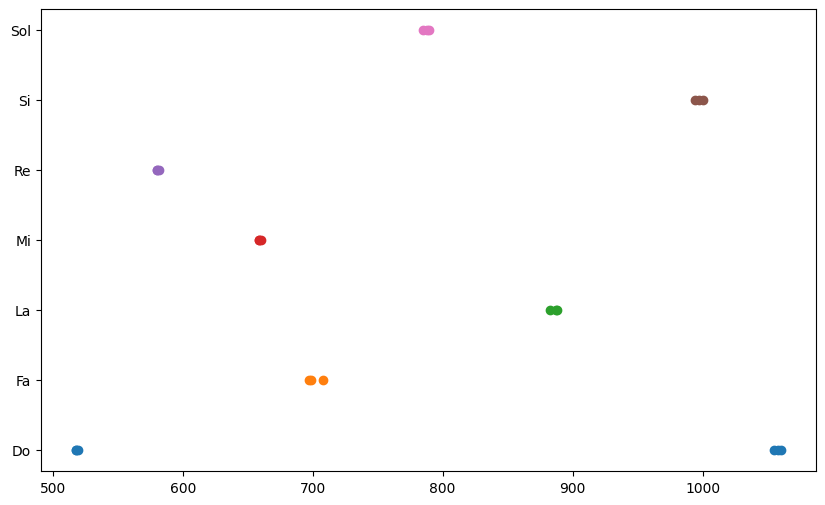

In [74]:
import os
import numpy as np
import librosa
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

# Define the path to the dataset
data_path = './part2/train/'

# Initialize lists to hold features and labels
features = []
labels = []

# Load labeled files
plot_data_train=[]
for file in os.listdir(data_path):
    if file.endswith('.m4a') and 'Do' in file or 'Re' in file or 'Mi' in file or 'Fa' in file or 'Sol' in file or 'La' in file or 'Si' in file:
        label = file.split('_')[0]  # Extract the note name (e.g., Do, Re, Mi, etc.)
        labels.append(label)

        # Load the audio file and extract features (e.g., the main frequency)
        file_path = os.path.join(data_path, file)
        y, sr = librosa.load(file_path, sr=None)
        fft = np.abs(np.fft.rfft(y))
        freqs = np.fft.rfftfreq(len(y), d=1/sr)
        peak_freq = freqs[np.argmax(fft)]  # Main frequency (peak)
        features.append([peak_freq])
        plot_data_train.append([peak_freq, file.split(".")[0]])

# Convert to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Plotting the peak frequencies for each note
plt.figure(figsize=(10, 6))
for note in np.unique(labels):
    mask = labels == note
    plt.scatter(features[mask], labels[mask], label=note)

# Standardize the features
scaler = StandardScaler()
features = scaler.fit_transform(features)

for k in range(1, 9):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features, labels)
    accuracy = knn.score(features, labels)
    print(f"K: {k}, Validation Accuracy: {accuracy}")



I pick the best K=4. Because of the small number of training data, all the choices of K from 1 to 5 result in 100% accuracy, but choosing K larger with result in more robust answer.

## Making Predictions

In [75]:
# Train the final KNN model
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(features, labels)

# Evaluate on the validation set
accuracy = knn.score(features, labels)
print(f"Validation Accuracy: {accuracy}")

# Load unlabeled files and classify them
unlabeled_features = []
unlabeled_files = []
test_path = "./part2/test/"
plot_data_test = []
for file in os.listdir(test_path):
    if file.endswith('.m4a') and file not in labels:
        file_path = os.path.join(test_path, file)
        y, sr = librosa.load(file_path, sr=None)
        fft = np.abs(np.fft.rfft(y))
        freqs = np.fft.rfftfreq(len(y), d=1/sr)
        peak_freq = freqs[np.argmax(fft)]
        unlabeled_features.append([peak_freq])
        unlabeled_files.append(file)
        plot_data_test.append([peak_freq, file.split(".")[0]])
        

# Standardize the unlabeled features
untransformed_features = np.array(unlabeled_features)
unlabeled_features = scaler.transform(unlabeled_features)

# Predict the labels for the unlabeled files
predicted_labels = knn.predict(unlabeled_features)

# Print the results
for file, label in zip(unlabeled_files, predicted_labels):
    print(f"File: {file}, Predicted Label: {label}")

Validation Accuracy: 1.0


/var/folders/l0/_cgjl26d5xj31bs49yx7mv440000gn/T/ipykernel_75923/1841636379.py:17: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/Users/azimi2kht/miniconda3/envs/signal/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File: 8.m4a, Predicted Label: Re
File: 9.m4a, Predicted Label: Fa
File: 11.m4a, Predicted Label: Si
File: 10.m4a, Predicted Label: Mi
File: 12.m4a, Predicted Label: Do
File: 13.m4a, Predicted Label: Sol
File: 16.m4a, Predicted Label: Do
File: 14.m4a, Predicted Label: La
File: 15.m4a, Predicted Label: Re
File: 1.m4a, Predicted Label: Si
File: 2.m4a, Predicted Label: Fa
File: 3.m4a, Predicted Label: Do
File: 7.m4a, Predicted Label: La
File: 6.m4a, Predicted Label: Do
File: 4.m4a, Predicted Label: Mi
File: 5.m4a, Predicted Label: Sol


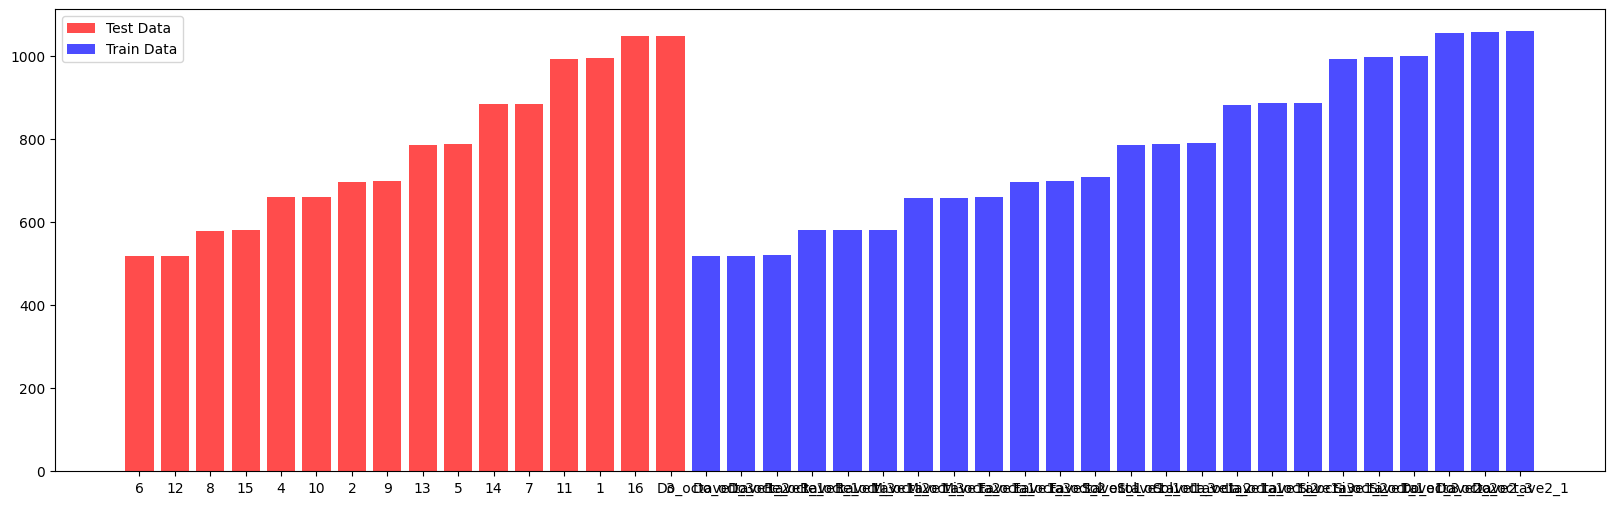

In [81]:
# Plotting plot_data as bar plot
plot_data_test.sort()
plot_data_train.sort()

plt.figure(figsize=(20, 6))
plt.bar([data[1] for data in plot_data_test], [data[0] for data in plot_data_test], color='r', alpha=0.7)
plt.bar([data[1] for data in plot_data_train], [data[0] for data in plot_data_train], color='b', alpha=0.7)
plt.legend(["Test Data", "Train Data"])
